# Visualizing Intermediate Activations

## Introduction

Deep learning is extremely powerful and helping to lead the advancement of many AI tasks. That said, deep learning is often criticized for having a lot of *black box* algorithms in that the components of the model itself are difficult to interpret. In the case of CNNs and image recognition, this is actually not true at all! In this lecture, you will explore how you can visualize the intermediate hidden layers within your CNN to uncover what sorts of features your deep network is uncovering through some of the various filters. With that, you'll gain interesting insights and knowledge as to how your CNN is *seeing* the world.  

## Objectives

You will be able to:

* Load a saved model
* Visualize the filters produced by hidden layers in a CNN

## Loading Our Previous Model

In [1]:
from keras.models import load_model

model = load_model('chest_xray_all_data.h5')
model.summary()  # As a reminder

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Loading an Image from the Training Set

In [2]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 150, 150, 3)


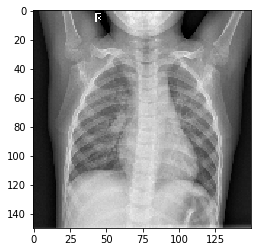

In [3]:
img_path = 'images/IM-0115-0001.jpeg'


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

## Visualizing a Layer

In order to get a better sense of what representations our CNN is learning under the hood, we will visualize the feature maps generated during training. Recall from our previous discussions that CNNs work by applying a filter successively over an image. This transformation creates a new representation of the image which we call a feature map. 


<img src="images/Image_264_VIzInternActvation.png" width="550">

In [4]:
from keras import models

In [5]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

If you return to the model summary, you can inspect the third dimension of each activation layer's output.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

From this, you can see that the initial two layers output feature maps that have 32 channels each. You can visualize each of these channels individually by slicing the tensor along that axis. Subsequentially, the next two layers have 64 channels each and the 5th through 8th layers have 128 channels each. Recall that this allows the CNN to detect successively more abstract patterns. Here's what slicing one of these feature maps and visualizing an individual channel looks like in practice:

(1, 148, 148, 32)


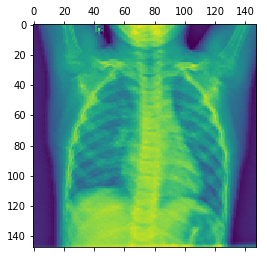

In [7]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

#We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

(1, 148, 148, 32)


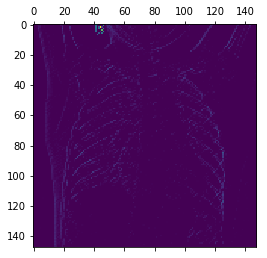

In [8]:
#Repeating the process for another channel (the 30th)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

More extensively, we could also visualize all 32 of these channels from the first activation function.

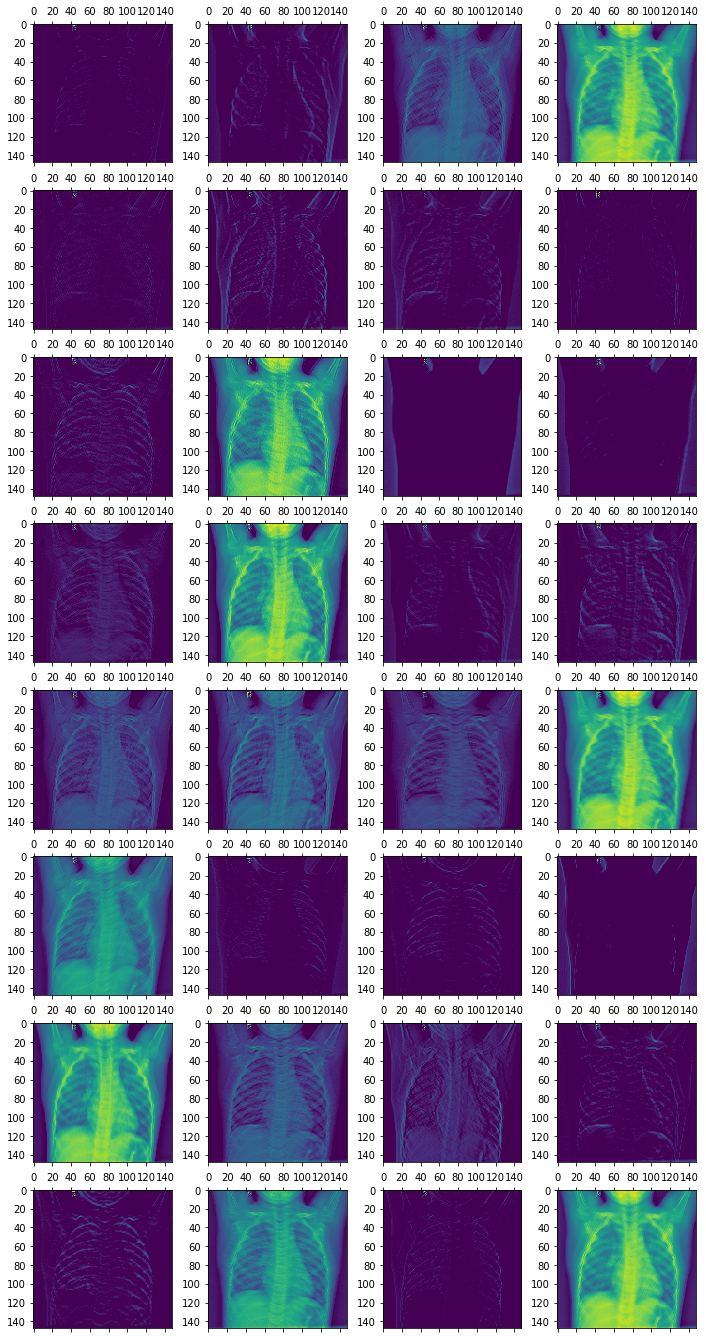

In [9]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

## Repeating for all Layers

Similarly, you could also visualize other layers. Below is the visualization of the 29th channel for each of the activation layers. (Recall that there are more channels in later layers.)

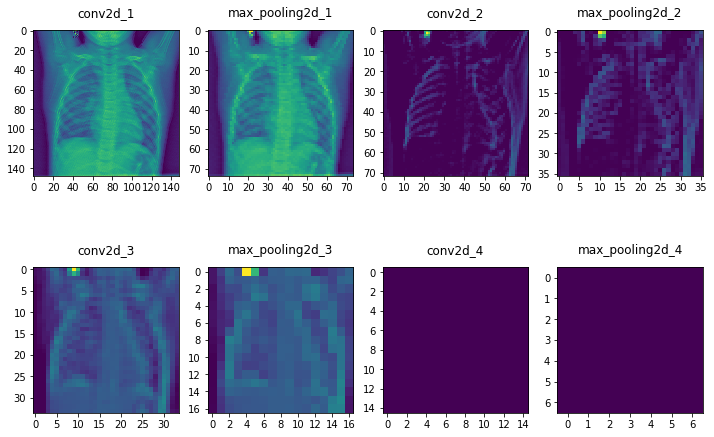

In [10]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 29], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

Note how the later layers are more abstract representations, and in the case of the final two layers, we see nothing at all. This demonstrates how the representations learned by CNN architectures become increasingly abstract with the depth of the layers. In the case of the blank images displayed, this indicates that the patterns were not present in the current image. In other words, the CNN learned various patterns through training, but these more abstract features such as a rib or a lung were not found in this particular instance.

## Summary

In this lesson, you investigated how you can visualize feature maps, the representations learned by CNNs during training. While outside the scope of this lesson, there are other visualization techniques for CNNs such as visualizing the filters themselves, or visualizing heatmaps of the original image to identify where in an image patterns were identified. In the upcoming lab, you'll continue to practice visualizing feature maps, as you did here creating a complete visualization of all channels within each of the 8 model layers.